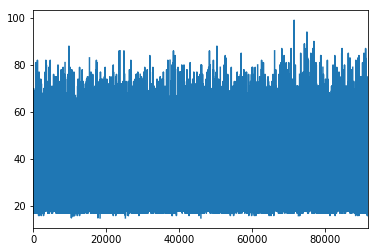

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ri = pd.read_csv('C:/Users/user/Downloads/pycon-2018-tutorial-master/pycon-2018-tutorial-master/police.csv')
ted = pd.read_csv('C:/Users/user/Downloads/pycon-2018-tutorial-master/pycon-2018-tutorial-master/ted.csv')
ri.driver_age.plot()

#DATASET 1 STANFORD OPEN POLICING PROJECT



In [2]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
ri.shape


(91741, 15)

In [4]:
ri.dtypes


stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [5]:
ri.isnull().sum()

''' this is to check the sum of all missing values'''

' this is to check the sum of all missing values'

In [6]:
'''Remove column that only contains missing values, here we use the results from ri.shape to conclude that county_name has 
all missing values because rows = 91741'''

ri.drop('county_name', axis = 'columns', inplace = True)
 
    

In [7]:
ri.shape

(91741, 14)

In [8]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

Do men or women speed more often? BY FILTERING

In [9]:

'''we check the count of the violation of speeding on the two genders we add the (normalize = True argument to get 
percentages)'''

ri[ri.violation =='Speeding'].driver_gender.value_counts(normalize = True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [10]:
'''a different way to work this is "when a man is pulled over how often is it for speeding or vice versa"'''

ri[ri.driver_gender == "M"].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [11]:
ri[ri.driver_gender == "F"].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [12]:
"' TO GET ALL THESE ON ONE LINE OF CODE WE USE GROUPBY'"

ri.groupby('driver_gender').violation.value_counts(normalize=True)


driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

Does Gender affaect who gets seached?

In [13]:
'''being a bollean value only true/false'''
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [14]:


'''this is shorter it gives you the percentage of times it is 1 or true'''
ri.search_conducted.mean()

0.03483720473942948

In [15]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [16]:
#here we group by two columns to compare the data on how often each of the gender is searched based on the violations

ri.groupby(['violation','driver_gender',]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

why is search Type missing so often

In [17]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [18]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

'''here we note that search type is missing every time search 
is not conducted'''

In [19]:
ri[ri.search_conducted==False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

During a search how often is the driver frisked

In [20]:
ri['Frisk'] = ri.search_type.str.contains('Protective Frisk')

In [21]:
ri.Frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: Frisk, dtype: int64

In [22]:
ri.Frisk.sum()

274

In [23]:
ri.Frisk.mean()

0.08573216520650813

which year had the least number of stops

In [24]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [25]:
combined = ri.stop_date.str.cat(ri.stop_time,sep=" ")

In [26]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [27]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
Frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [28]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

how does drug activity change by time of day?

In [29]:
'''we use dstop_datetime and drugs_related_stop'''

ri.drugs_related_stop.mean()


0.008883705213590434

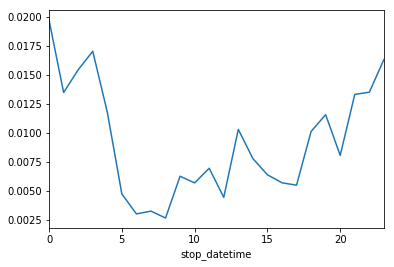

In [30]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

In [31]:
'''here we note that drug related stops dip during the day'''

'here we note that drug related stops dip during the day'

do most stops occur at night

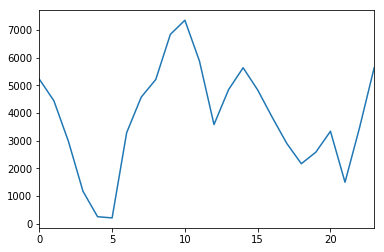

In [32]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [33]:
ri[(ri.stop_datetime.dt.hour>4)&(ri.stop_datetime.dt.hour<22)].shape

(68575, 16)

we can also use count

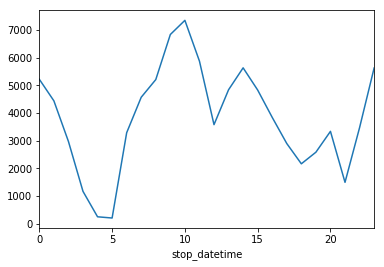

In [34]:
ri.groupby(ri.stop_datetime.dt.hour).stop_datetime.count().plot()

find the bad data in the stop_duration column and fix it

In [35]:
'''check on the value counts'''

ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [37]:
ri.driver_race.value_counts()

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

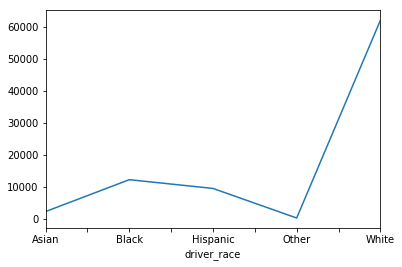

In [42]:
ri.groupby(ri.driver_race).is_arrested.count().plot()